In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df['Price'] = housing.target

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.shape

(20640, 9)

In [10]:
df.duplicated().sum()

0

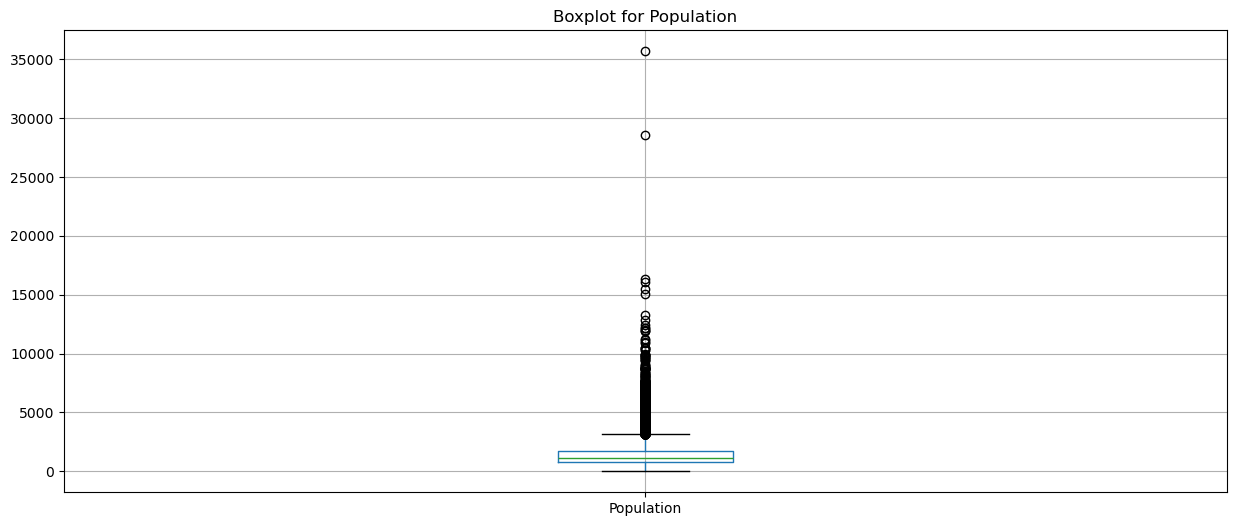

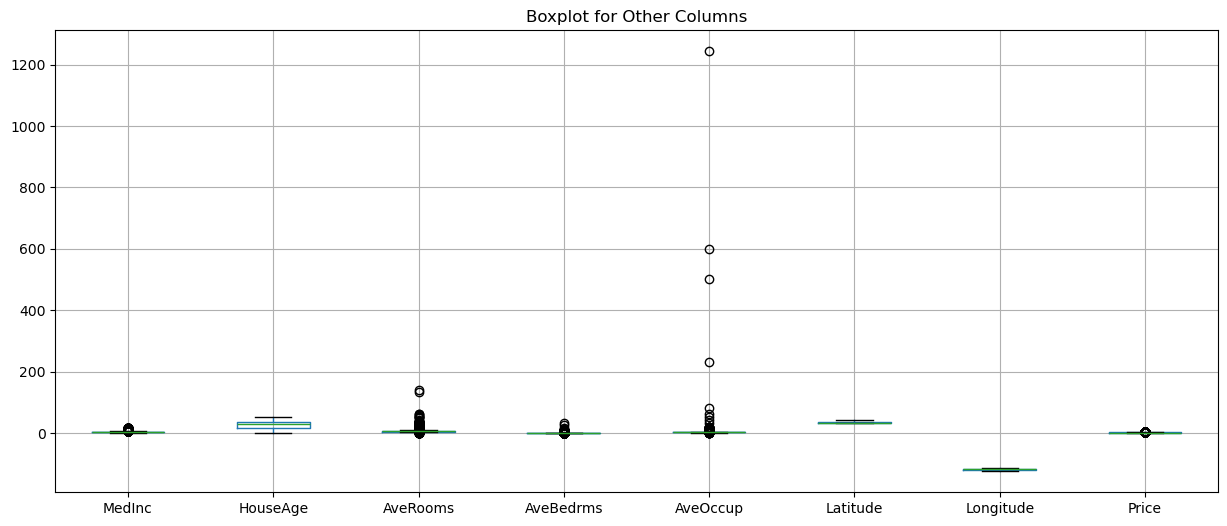

In [11]:
import matplotlib.pyplot as plt

# Boxplot for 'population' column
df[['Population']].boxplot(figsize=(15,6))
plt.title('Boxplot for Population')
plt.show()

# Boxplot for the remaining columns
df.drop(columns=['Population']).boxplot(figsize=(15,6))
plt.title('Boxplot for Other Columns')
plt.show()


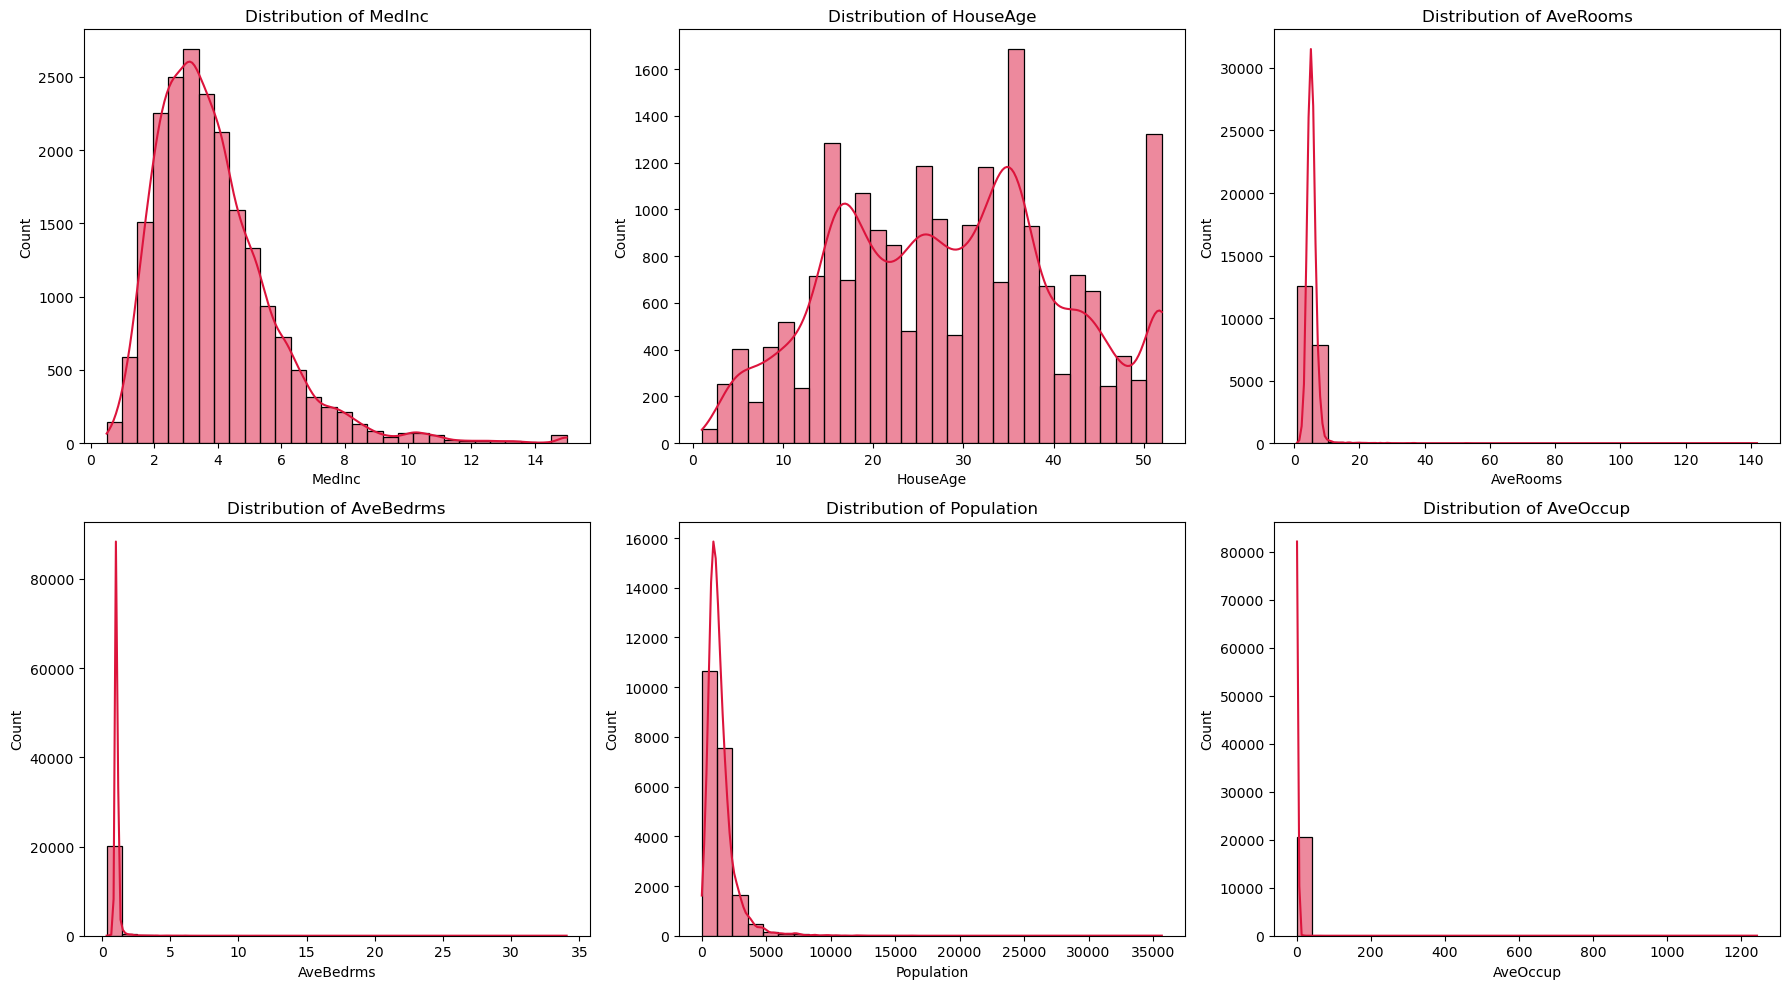

In [12]:
#Creating Hist plot with kde for checking data skewness
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for ax, col in zip(axes.flat, df):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='crimson')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

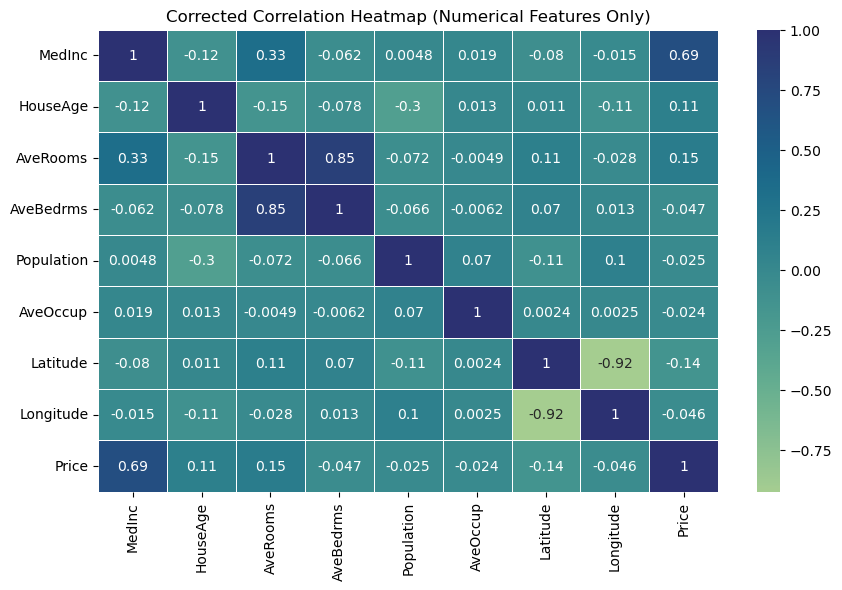

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="crest", linewidths=0.5)
plt.title("Corrected Correlation Heatmap (Numerical Features Only)")
plt.show()


 Performance for Random Forest:
Train R²: 0.8960, Test R²: 0.8014, Cross-Validation R²: 0.8043
RMSE: 0.5101

 Performance for XGBoost:
Train R²: 0.8486, Test R²: 0.8160, Cross-Validation R²: 0.8183
RMSE: 0.4910

 Performance for Linear Regression:
Train R²: 0.6126, Test R²: 0.5758, Cross-Validation R²: 0.6115
RMSE: 0.7456


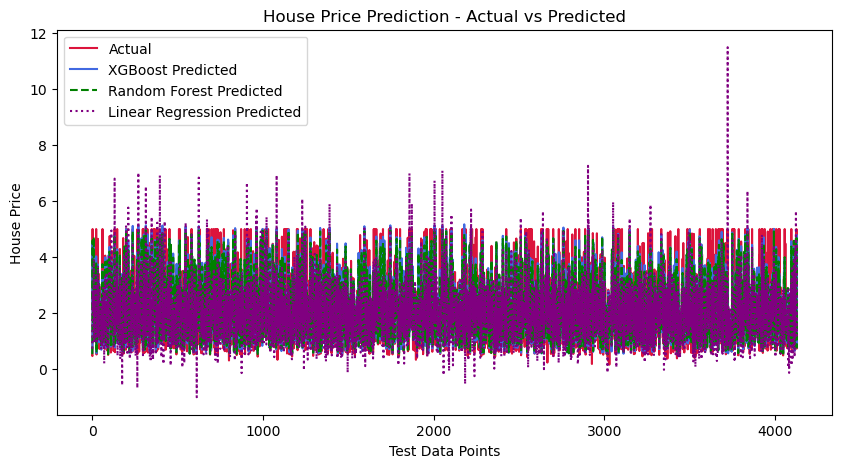

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
X = df.drop(columns=['Price'])
y = df['Price']
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=600,
    max_depth=18,
    min_samples_split=12, 
    min_samples_leaf=4,  
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=600,  
    learning_rate=0.03,  
    max_depth=8,  
    min_child_weight=3,  
    reg_alpha=5,  
    reg_lambda=15,  
    gamma=3, 
    subsample=0.85,  
    colsample_bytree=0.75,  
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

# Save Models
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf_model, f)
with open("xgboost.pkl", "wb") as f:
    pickle.dump(xgb_model, f)
with open("linear_regression.pkl", "wb") as f:
    pickle.dump(lr_model, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Cross-Validation Scores
cv_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='r2')
cv_xgb = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='r2')
cv_lr = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='r2')

# Model Evaluation Function
def evaluate_model(y_train, y_test, y_train_pred, y_test_pred, cv_scores, model_name):
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"\n Performance for {model_name}:")
    print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}, Cross-Validation R²: {np.mean(cv_scores):.4f}")
    print(f"RMSE: {rmse:.4f}")

# Evaluate Models
evaluate_model(y_train, y_test, y_pred_rf_train, y_pred_rf, cv_rf, "Random Forest")
evaluate_model(y_train, y_test, y_pred_xgb_train, y_pred_xgb, cv_xgb, "XGBoost")
evaluate_model(y_train, y_test, y_pred_lr_train, y_pred_lr, cv_lr, "Linear Regression")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='crimson')
plt.plot(y_pred_xgb, label='XGBoost Predicted', color='royalblue')
plt.plot(y_pred_rf, label='Random Forest Predicted', color='green', linestyle='dashed')
plt.plot(y_pred_lr, label='Linear Regression Predicted', color='purple', linestyle='dotted')
plt.title('House Price Prediction - Actual vs Predicted')
plt.xlabel('Test Data Points')
plt.ylabel('House Price')
plt.legend()
plt.show()


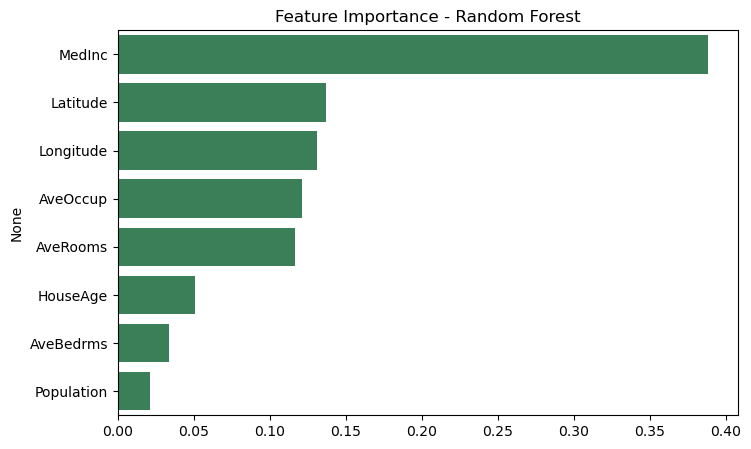

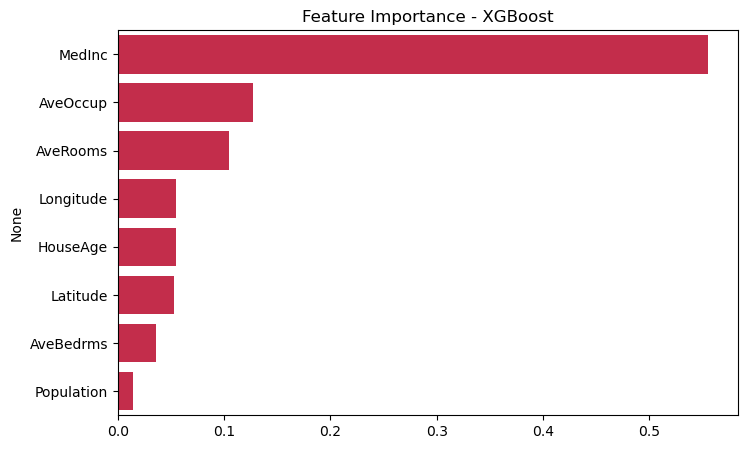

In [15]:
# Feature Importance - Random Forest
custom_color_rf = "seagreen"
custom_color_xgb = "crimson"
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index, color=custom_color_rf)
plt.title("Feature Importance - Random Forest")
plt.show()

# Feature Importance - XGBoost
if hasattr(xgb_model, 'feature_importances_'):
    xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index, color=custom_color_xgb)
    plt.title("Feature Importance - XGBoost")
    plt.show()
else:
    booster = xgb_model.get_booster()
    xgb_feature_importance = booster.get_score(importance_type='weight')
    xgb_feature_importance = pd.Series(xgb_feature_importance).sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index, color=custom_color_xgb)
    plt.title("Feature Importance - XGBoost (Booster Score)")
    plt.show()